In [1]:
!pip install lasio

In [2]:
import lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
from scipy.ndimage import median_filter

https://drive.google.com/drive/folders/1xOmhNRJg6u7mKeusU2k2AKvm2bR2hi1-?usp=sharing

In [3]:
# !pip install gdown
!gdown --folder https://drive.google.com/drive/folders/1xOmhNRJg6u7mKeusU2k2AKvm2bR2hi1-?usp=sharing -O pasta_compartilhada
!ls pasta_compartilhada

Retrieving folder contents
Processing file 1SJFtPJIJN6msI9XKxc9q8ARS7BZjp8sr 3-MGP-4-BA.las
Processing file 1y392Ua7dqcAfiLVSbU3kUHGtmRk8u7GN 3-MGP-6-BA.las
Processing file 1aGzZ1khrPflZvV6NR21F1ut5wy1I2sNs 3-MGP-20-BA.las
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1SJFtPJIJN6msI9XKxc9q8ARS7BZjp8sr
To: /content/pasta_compartilhada/3-MGP-4-BA.las
100% 9.01M/9.01M [00:00<00:00, 39.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1y392Ua7dqcAfiLVSbU3kUHGtmRk8u7GN
To: /content/pasta_compartilhada/3-MGP-6-BA.las
100% 5.42M/5.42M [00:00<00:00, 31.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aGzZ1khrPflZvV6NR21F1ut5wy1I2sNs
To: /content/pasta_compartilhada/3-MGP-20-BA.las
100% 10.4M/10.4M [00:00<00:00, 49.6MB/s]
Download completed
3-MGP-20-BA.las  3-MGP-4-BA.las  3-MGP-6-BA.las


In [4]:
def litologia(depth):
    if depth>=390 and depth<=1548:
        return 'ZONA0'
    if depth>1548 and depth<=1985:
        return 'ZONA1'
    if depth>2424 and depth<=2750:
        return 'ZONA2'

In [5]:
las = lasio.read("pasta_compartilhada/3-MGP-4-BA.las")
df = las.df()
df.index.name = 'MD'
df.head()

,SHRP,CQ,CCRE,NP,DEVI,HT34,HAZI,HT41,CLEX,QUAL,...,DT,NEUT,GR,NPHI,CAL2,CALI,TENS,NCNL,FCNL,SP
MD,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.columns)

Index(['SHRP', 'CQ', 'CCRE', 'NP', 'DEVI', 'HT34', 'HAZI', 'HT41', 'CLEX',
       'QUAL', 'C13', 'HT12', 'DIP', 'DEPT:2', 'P1AZ', 'C24', 'PART', 'DPAP',
       'HT23', 'CDDS', 'AZIM', 'SC', 'RB', 'NM24', 'NM13', 'DCX', 'AZIE',
       'OFLG', 'ILD', 'AMP', 'FFDC', 'RHOB', 'DRHO', 'NFDC', 'SFLU', 'DT',
       'NEUT', 'GR', 'NPHI', 'CAL2', 'CALI', 'TENS', 'NCNL', 'FCNL', 'SP'],
      dtype='object')


In [7]:
las.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS log ASCII Standa"),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste"),
  HeaderItem(mnemonic="DLM", unit="", value="SPACE", descr="Column Data Section ")],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="0.0", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="m", value="3543.0", descr="STOP DEPTH"),
  HeaderItem(mnemonic="STEP", unit="m", value="0.2", descr="STEP"),
  HeaderItem(mnemonic="NULL", unit="", value="-9999.25", descr="NULL VALUE"),
  HeaderItem(mnemonic="COMP", unit="", value="Undefined", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="3MGP0020BA", descr="WELL"),
  HeaderItem(mnemonic="FLD", unit="", value="Undefined", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="3MGP0020BA", descr="LOCATION"),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="CNTY", unit="", value="", descr="COUNTY

In [8]:
cols = ["GR", "SP", "CALI", 'ILD', 'SFLU', 'DT', 'RHOB', 'DRHO', 'NPHI', 'NEUT']

In [9]:
df['NEUT'].max()

378.24327

In [10]:
df['NEUT'] = df['NEUT']/1000

In [11]:
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
GR,15783.0,50.561725,10.069654,16.96875,46.093750,52.390620,57.621090,87.929690
SP,16275.0,99.806713,36.450866,-36.09212,76.373775,98.547120,132.000000,182.019530
CALI,15550.0,12.378885,2.012136,6.21000,11.040162,12.186755,13.434505,17.833010
ILD,15963.0,8.806783,48.481189,0.50061,2.177860,3.662840,7.492190,2000.000040
SFLU,15778.0,4.776305,3.356500,0.19194,2.490250,3.447275,5.766602,27.669360
DT,15768.0,89.315328,20.123604,8.68359,74.501955,84.416015,101.679257,175.160160
RHOB,13949.0,2.370298,0.169363,2.00002,2.250660,2.396820,2.491730,2.743700
DRHO,13923.0,0.091113,0.097574,-1.20949,0.055660,0.096480,0.134110,0.361370
NPHI,14811.0,0.276274,0.103824,0.02563,0.197050,0.267420,0.343790,0.816870
NEUT,16289.0,0.211517,0.073077,0.00000,0.153293,0.198844,0.281460,0.378243


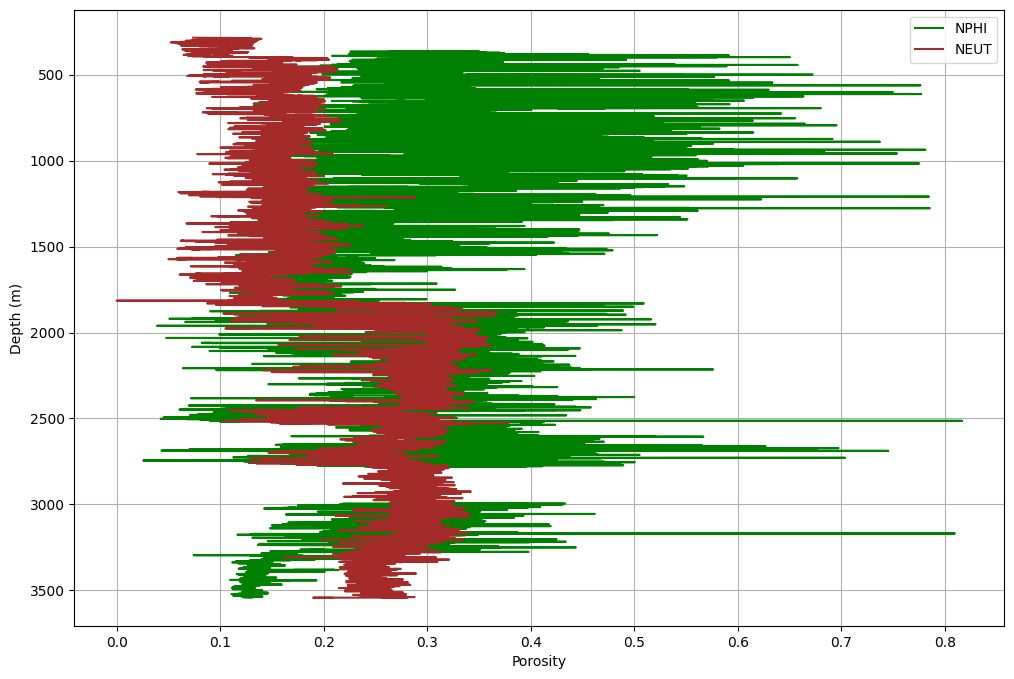

In [12]:
plt.figure(figsize=(12,8))
plt.plot(df['NPHI'], df.index, color='green')
plt.plot(df['NEUT'], df.index, color='brown')
plt.gca().invert_yaxis()
plt.xlabel('Porosity')
plt.ylabel('Depth (m)')
plt.legend(['NPHI', 'NEUT'])
plt.grid()
plt.show()

In [13]:
cols.remove('NEUT')
df = df[cols]

In [14]:
mask2 = (df.index > 3000) & (df.NPHI > 0.5)
mask1 = (df.index > 1850) & (df.index < 2600) & (df.NPHI > 0.5)
mask0 = (df.index < 1500) & (df.NPHI > 0.7)

masks = [mask0, mask1, mask2]

for m in masks:
    idxs = df.loc[m].index
    for i in idxs:
        window = df.loc[(df.index >= i-3) & (df.index <= i+3), 'NPHI']
        window = window.drop(i, errors='ignore')
        if not window.empty:
            df.loc[i, 'NPHI'] = window.mean()
        else:
            df.loc[i, 'NPHI'] = np.nan

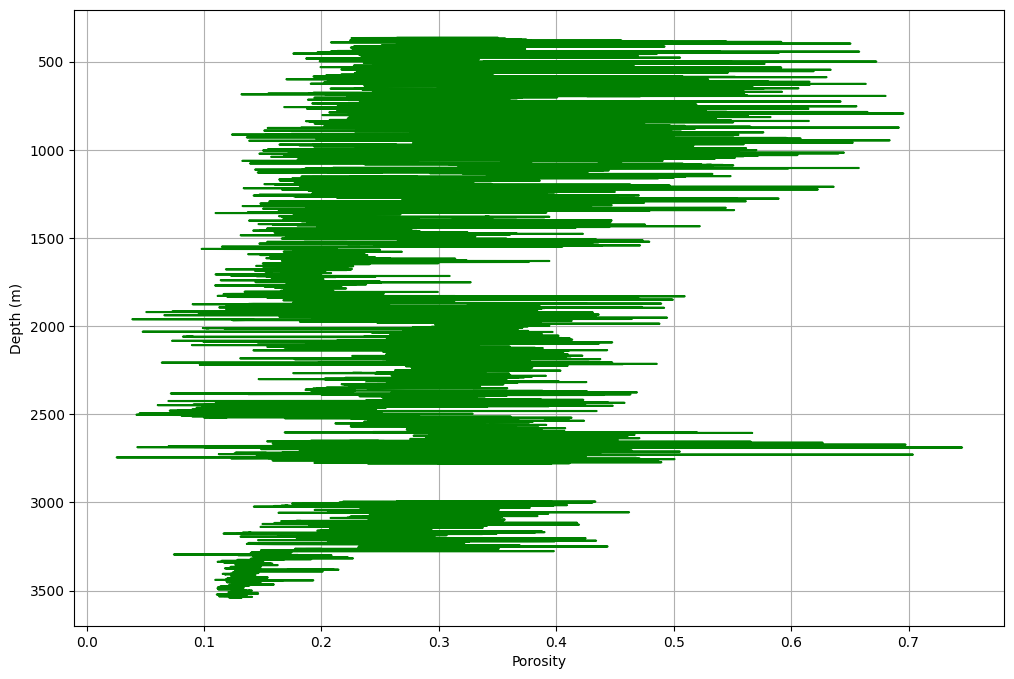

In [15]:
plt.figure(figsize=(12,8))
plt.plot(df['NPHI'], df.index, color='green')
plt.gca().invert_yaxis()
plt.xlabel('Porosity')
plt.ylabel('Depth (m)')
plt.grid()
plt.show()

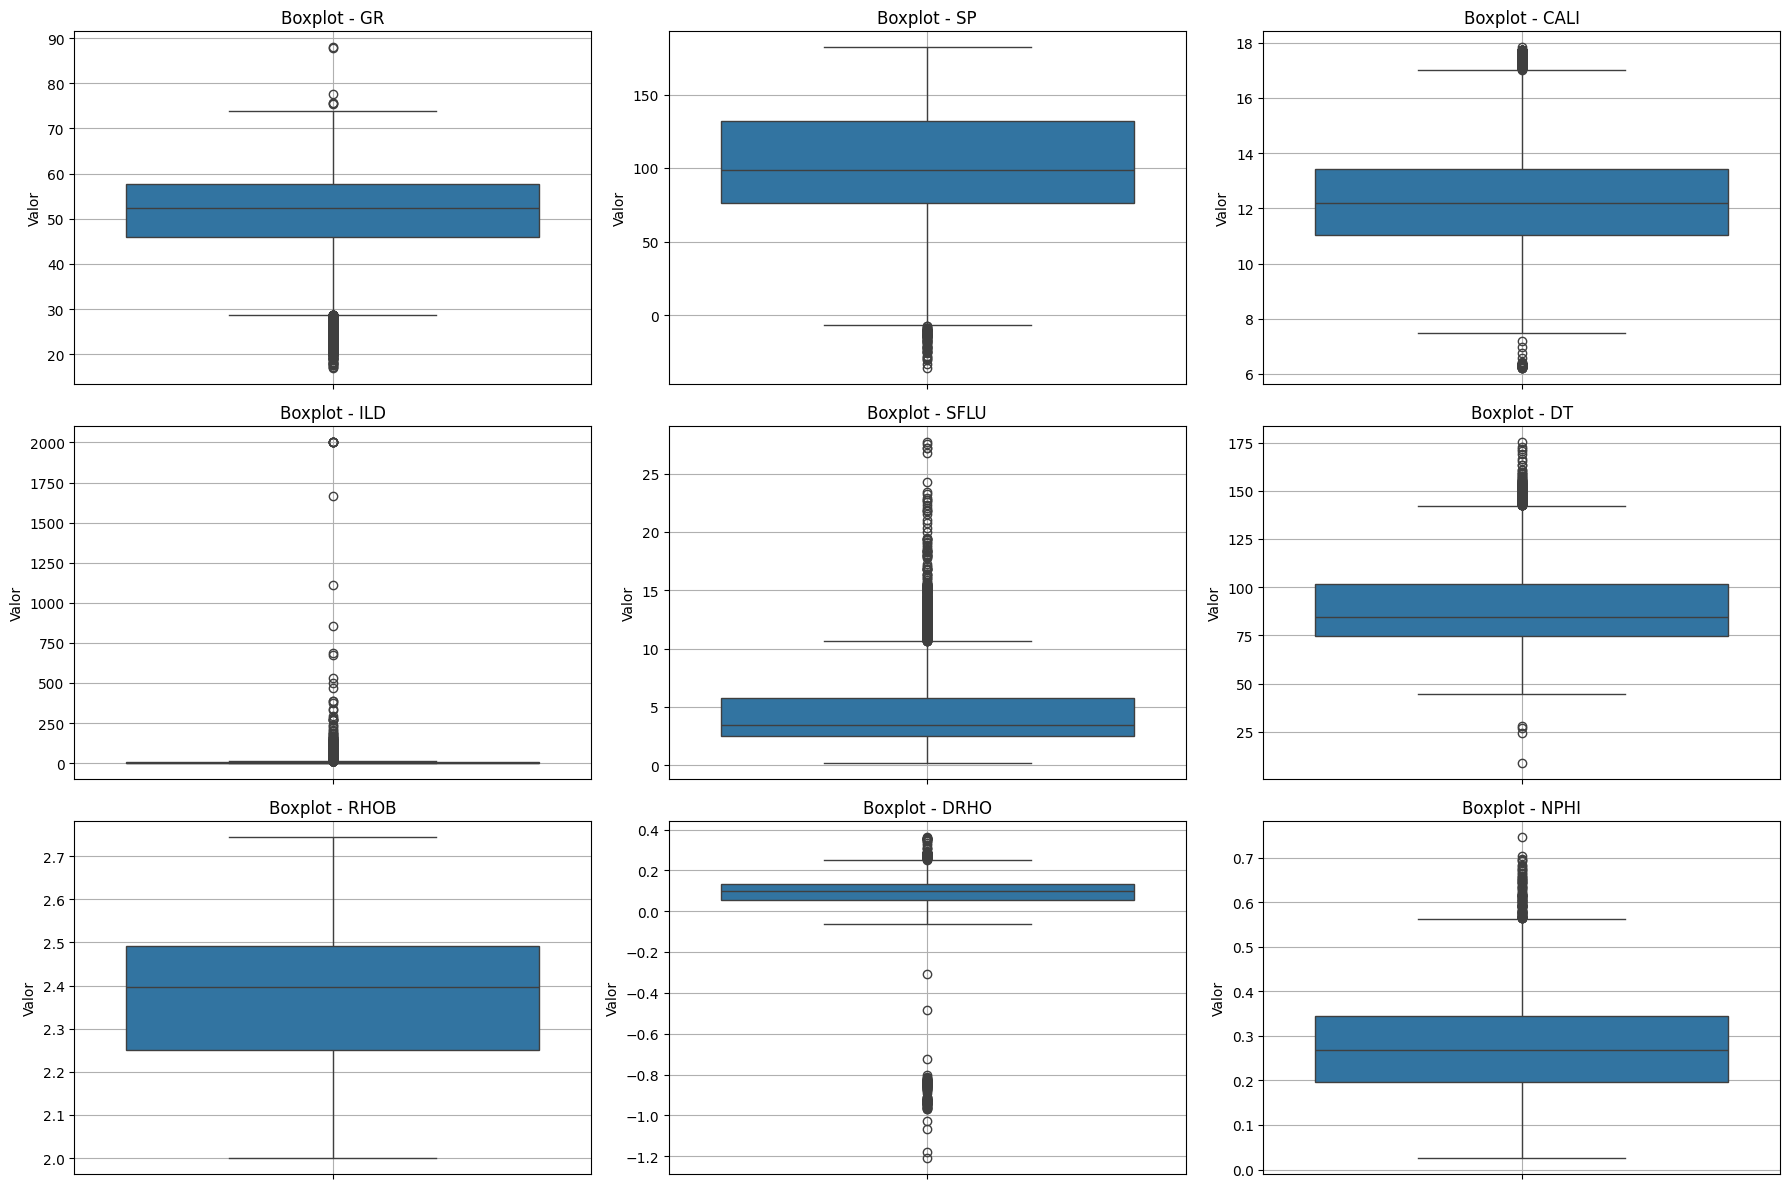

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, curva in enumerate(cols):
    sns.boxplot(y=df[curva], ax=axes[i])
    axes[i].set_title(f'Boxplot - {curva}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Valor')
    axes[i].grid(True)

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Definição das Zonas
- Critério: Formação
- Zona 0: Fm. Pojuca
- Zona 1: Fm. Marfim

In [17]:
df['ZONAS'] = df.index.map(litologia)

## Calculo das Porosidades

# Porosidade Sonica

**Fórmula**  
$$
\phi_{sonic} \;=\; \frac{\Delta t - \Delta t_{matrix}}{\Delta t_{fluid} - \Delta t_{matrix}}
$$

**Parâmetros**  
- **$\Delta t$** — tempo de trânsito do intervalo (μs/ft ou μs/m) medido no poço  
- **$\Delta t_{matrix}$** — tempo de trânsito da matriz da rocha (ex.: 55,5 μs/ft para arenito)  
- **$\Delta t_{fluid}$** — tempo de trânsito do fluido intersticial (ex.: 189 μs/ft para água)  
- **$\phi_{sonic}$** — porosidade calculada a partir do perfil sônico  

In [18]:
def phi_sonico(dt,dt_matrix=55.5,dt_f=189):
    return (dt-dt_matrix)/(dt_f-dt_matrix)

In [19]:
df = df.copy()
df.loc[:, 'PHIS'] = df['DT'].apply(phi_sonico)

# Porosidade Densidade

**Fórmula**  
$$
\phi_{RHOB} \;=\; \frac{\rho_{matrix} - \rho_{b}}{\rho_{matrix} - \rho_{fluid}}
$$

**Parâmetros**  
- **$\rho_{b}$** — densidade aparente medida pelo perfil de densidade (g/cm³)  
- **$\rho_{matrix}$** — densidade da matriz da rocha (ex.: 2,65 g/cm³ para quartzo)  
- **$\rho_{fluid}$** — densidade do fluido intersticial (ex.: 1,0 g/cm³ para água)  
- **$\phi_{RHOB}$** — porosidade calculada a partir do perfil de densidade  

In [20]:
def phi_rhob(rhob,rho_matrix=2.65,rho_f=1):
    return (rho_matrix-rhob)/(rho_matrix-rho_f)

In [21]:
df = df.copy()
df.loc[:, 'PHID'] = df['RHOB'].apply(phi_rhob)

# Porosidade Gaymar

**Fórmula**  
$$
\phi_{Gaymar} \;=\; \sqrt{\frac{\phi_{D}^{2} + \phi_{N}^{2}}{2}}
$$

**Parâmetros**  
- **$\phi_{D}$** — porosidade derivada do perfil de densidade  
- **$\phi_{N}$** — porosidade derivada do perfil de neutrão  
- **$\phi_{Gaymar}$** — porosidade combinada (Gaymar), que busca reduzir efeitos de gás e litologia mista

In [22]:
def phi_gaymar(phid,phin):
    return ((phid**2 + phin**2)/2)**(1/2)

In [23]:
df = df.copy()
df.loc[:, 'PHIT'] = phi_gaymar(df['PHID'].to_numpy(), df['NPHI'].to_numpy())

## Definição de GR min e max

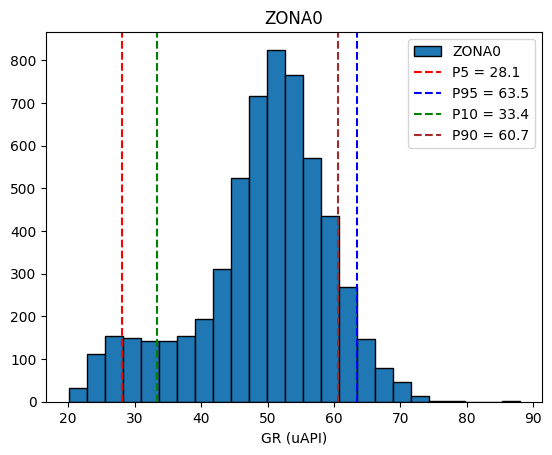

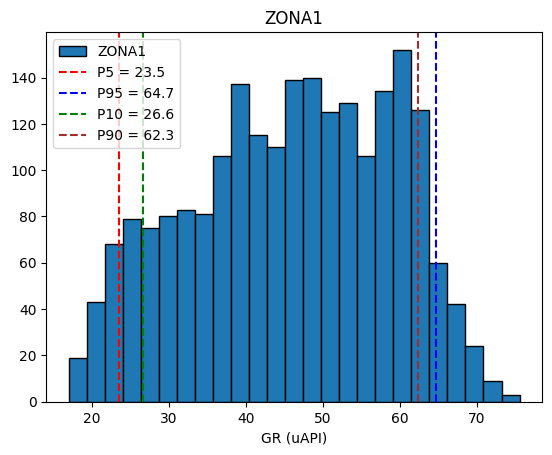

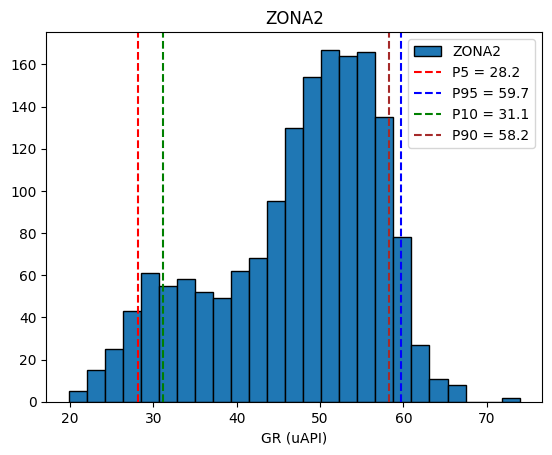

In [24]:
for i in df.ZONAS.dropna().unique():
    fig, axes = plt.subplots()
    axes.set_title(i)
    axes.set_xlabel('GR (uAPI)')
    dados = df[df.ZONAS == i].GR.dropna()
    axes.hist(dados, bins=25, edgecolor='black', label=i)

    p5, p10, p90, p95 = np.percentile(dados, [5, 10, 90, 95])

    axes.axvline(p5, color='red', linestyle='--', linewidth=1.5, label=f'P5 = {p5:.1f}')
    axes.axvline(p95, color='blue', linestyle='--', linewidth=1.5, label=f'P95 = {p95:.1f}')

    axes.axvline(p10, color='green', linestyle='--', linewidth=1.5, label=f'P10 = {p10:.1f}')
    axes.axvline(p90, color='brown', linestyle='--', linewidth=1.5, label=f'P90 = {p90:.1f}')

    axes.legend()
    plt.show()

In [25]:
df = df.copy()
df["log_ILD"] = np.log10(df["ILD"])

fig_facets = px.scatter(
    df.dropna(subset=["ZONAS"]),
    x="GR",
    y="ILD",
    facet_col="ZONAS",
    facet_col_wrap=3,
    hover_data={"ZONAS": True, "GR": ":.2f", "ILD": ":.3g", "log_ILD": ":.3f"},
    labels={"GR": "GR (uAPI)", "ILD": "ILD (ohm·m)"},
    title="GR × ILD por Zona"
)

fig_facets.update_yaxes(type="log", title_text="ILD (log10)")
fig_facets.update_xaxes(title_text="GR (uAPI)")

fig_facets.update_layout(
    dragmode="zoom",
    hovermode="closest",
    legend_title_text="Zonas",
    margin=dict(l=40, r=20, t=60, b=40),
    height=500 + 180 * int(np.ceil(df["ZONAS"].nunique()/3)),
)

fig_facets.show()

## Calculo do Indice de Gamma Ray (IGR)

**Fórmula**  
$$
I_{GR} \;=\; \frac{GR_{log} - GR_{min}}{GR_{max} - GR_{min}}
$$

**Parâmetros**
- **$GR_{log}$** — leitura do GR
- **$GR_{min}$** — GR da areia limpa
- **$GR_{max}$** — GR do folhelho
- **$I_{GR}$** — índice normalizado de GR

In [26]:
def igr(gr,grmin,grmax):
    return (gr-grmin)/(grmax-grmin)

In [27]:
gr_min = [21, 21.15, 28.2]
gr_max = [69.24, 64.18, 62.21]

df['igr'] = np.nan

for i,j,k in zip(df.ZONAS.dropna().unique(),gr_min,gr_max):
    mask = df.ZONAS == i

    df.loc[mask, 'igr'] = igr(df[df.ZONAS==i]['GR'],j,k)


#Calculando Larionov

**Fórmula**  
$$
V_{sh} \;=\; 0.33 \,\big(2^{\,2\,I_{GR}} - 1\big)
$$

**Parâmetros**
- **$I_{GR}$** — índice de GR normalizado

In [28]:
def vsh_larionov_cretaceous(igr):
    return 0.33*(2**(2*igr)-1)

In [29]:
df['Vsh_Larionov'] = np.nan

for i in df.ZONAS.dropna().unique():
    mask = df.ZONAS == i

    df.loc[mask, 'Vsh_Larionov'] = vsh_larionov_cretaceous(df[df.ZONAS==i]['igr'])
    df.loc[mask, 'Vsh_Larionov'] = df['Vsh_Larionov'].loc[df.ZONAS==i].clip(0, 1)


## Calculando Clavier

**Fórmula**  
$$
V_{sh} \;=\; 1.7 \;-\; \sqrt{\,3.38 \;-\; (I_{GR} + 0.7)^2\,}
$$

**Parâmetros**
- **$I_{GR}$** — índice de GR normalizado
- Fórmula aplicável tipicamente para 0 ≤ $I_{GR}$ ≤ 1

In [30]:
def vsh_clavier(igr):
    termo = 3.38 - (igr + 0.7) ** 2
    vsh = 1.7 - np.sqrt(termo)
    vsh = np.where(termo < 0, 1, vsh)
    return vsh

In [31]:
df['Vsh_Clavier'] = np.nan

for i in df.ZONAS.dropna().unique():
    mask = df.ZONAS == i

    df.loc[mask, 'Vsh_Clavier'] = vsh_larionov_cretaceous(df[df.ZONAS==i]['igr'])
    df.loc[mask, 'Vsh_Clavier'] = df['Vsh_Clavier'].loc[df.ZONAS==i].clip(0, 1)


## Calculando Stieber

**Fórmula**  
$$
V_{sh} \;=\; \frac{I_{GR}}{3 - 2\,I_{GR}}
$$

**Parâmetros**
- **$I_{GR}$** — índice de GR normalizado

In [32]:
def vsh_stieber(igr,agr=3):
    return igr/(agr-(agr-1)*igr)

In [33]:
df['Vsh_Stieber'] = np.nan

for i in df.ZONAS.dropna().unique():
    mask = df.ZONAS == i

    df.loc[mask, 'Vsh_Stieber'] = vsh_stieber(df[df.ZONAS==i]['igr'])
    df.loc[mask, 'Vsh_Stieber'] = df['Vsh_Stieber'].loc[df.ZONAS==i].clip(0, 1)

## Definição da Porosidade do Folhelho (NPHI - PHID)

In [34]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

df = df.copy()

fig_facets = px.scatter(
    df.dropna(subset=["ZONAS"]),
    x="NPHI",
    y="PHID",
    facet_col="ZONAS",
    facet_col_wrap=3,
    range_color=[0, 1],
    color="Vsh_Larionov",
    color_continuous_scale="viridis",
    hover_data={"ZONAS": True, "NPHI":":.2f", "PHID":":.2f", "Vsh_Larionov":":.2f"},
    labels={"NPHI":"PHIN", "PHID":"PHID", "Vsh_Larionov":"Vsh Larionov"},
    title="Crossplot PHIN × PHID por Zona"
)

fig_facets.update_xaxes(range=[0, 0.5], title_text="PHIN", showgrid=True)
fig_facets.update_yaxes(range=[0, 0.5], title_text="PHID", showgrid=True)

refs_seen = set()
for tr in fig_facets.data:
    xref = tr.xaxis
    yref = tr.yaxis
    key = (xref, yref)
    if key in refs_seen:
        continue
    refs_seen.add(key)
    fig_facets.add_shape(
        type="line",
        x0=0, y0=0, x1=1, y1=1,
        xref=xref, yref=yref,
        line=dict(color="black", dash="dash"),
        layer="above"
    )

fig_facets.update_layout(
    dragmode="zoom",
    hovermode="closest",
    margin=dict(l=40, r=20, t=60, b=40),
    height=500 + 180 * int(np.ceil(df["ZONAS"].nunique()/3)),
    coloraxis_colorbar=dict(title="Vsh_Larionov")
)

fig_facets.show()

## Calculando VSH-ND (Neutão - Densidade)

**Fórmula**  
$$
V_{sh}^{ND} \;=\; \frac{\phi_{N} - \phi_{D}}{\phi_{N}^{shale} - \phi_{D}^{shale}}
$$

**Parâmetros**  
- **$\phi_{N}$** — leitura do perfil de porosidade de neutrão  
- **$\phi_{D}$** — leitura do perfil de porosidade de densidade  
- **$\phi_{N}^{shale}$** — valor típico de $\phi_{N}$ para folhelho  
- **$\phi_{D}^{shale}$** — valor típico de $\phi_{D}$ para folhelho  
- **$V_{sh}^{ND}$** — volume de argila estimado pelo método Neutrão–Densidade

In [35]:
def vsh_nd(phin,phid,phin_sh,phid_sh):
    return (phin-phid)/(phin_sh-phid_sh)

In [36]:
phin_sh = [0.3, 0.35, 0.32]
phid_sh = [0.2, 0.17, 0.13]

zonas_params = dict(zip(df.ZONAS.dropna().unique(), zip(phin_sh, phid_sh)))

df['Vsh_ND'] = df.apply(
    lambda row: np.clip(
        vsh_nd(row['NPHI'], row['PHID'], *zonas_params.get(row['ZONAS'], (np.nan, np.nan))),
        0, 1
    ) if row['ZONAS'] in zonas_params else np.nan,
    axis=1
)

## Visualisando o Dado

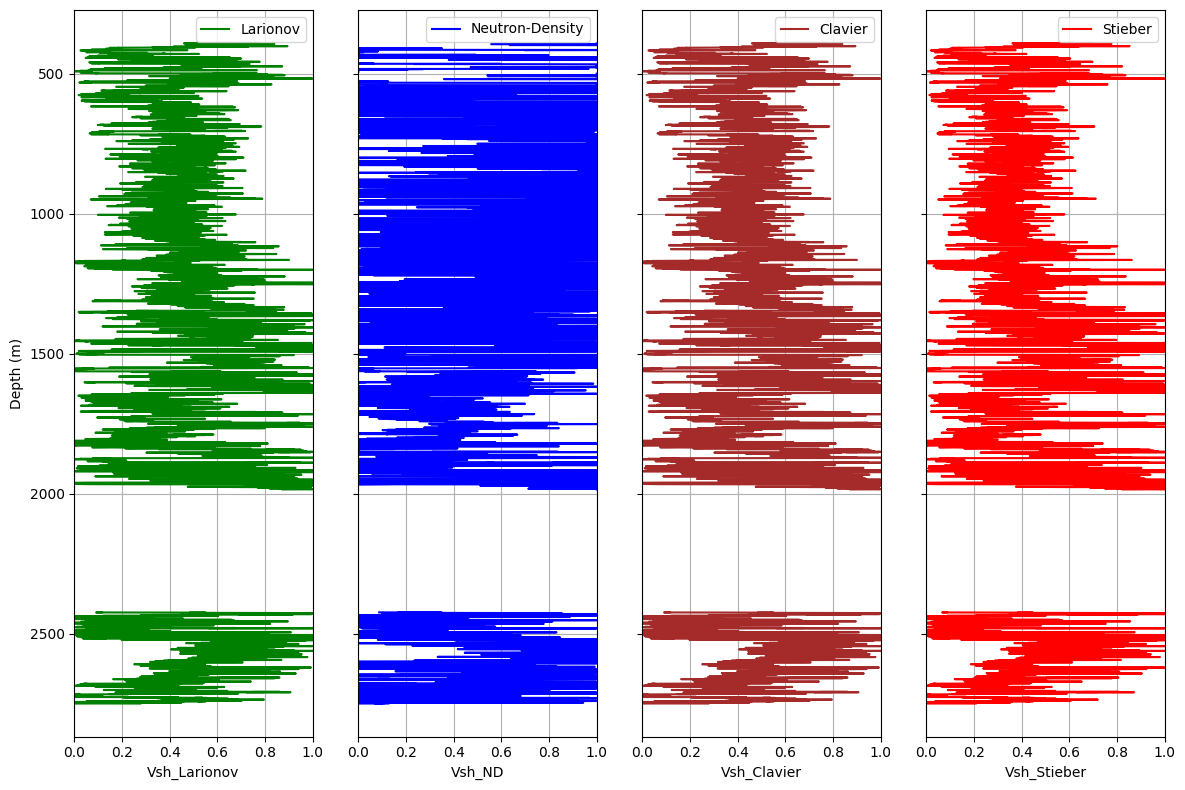

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(12, 8), sharey=True)

axes[0].plot(df['Vsh_Larionov'], df.index, color='green', label='Larionov')
axes[0].invert_yaxis()
axes[0].set_xlabel('Vsh_Larionov')
axes[0].set_ylabel('Depth (m)')
axes[0].set_xlim(0, 1)
axes[0].grid()
axes[0].legend()

axes[1].plot(df['Vsh_ND'], df.index, color='blue', label='Neutron-Density')
axes[1].set_xlabel('Vsh_ND')
axes[1].set_xlim(0, 1)
axes[1].grid()
axes[1].legend()

axes[2].plot(df['Vsh_Clavier'], df.index, color='brown', label='Clavier')
axes[2].set_xlabel('Vsh_Clavier')
axes[2].set_xlim(0, 1)
axes[2].grid()
axes[2].legend()

axes[3].plot(df['Vsh_Stieber'], df.index, color='red', label='Stieber')
axes[3].set_xlabel('Vsh_Stieber')
axes[3].set_xlim(0, 1)
axes[3].grid()
axes[3].legend()

plt.tight_layout()
plt.show()

## Suavisando VSH-ND

In [38]:
df['Vsh_ND_smooth'] = np.nan
df['Vsh_ND_smooth'] = median_filter(df['Vsh_ND'], size=3)

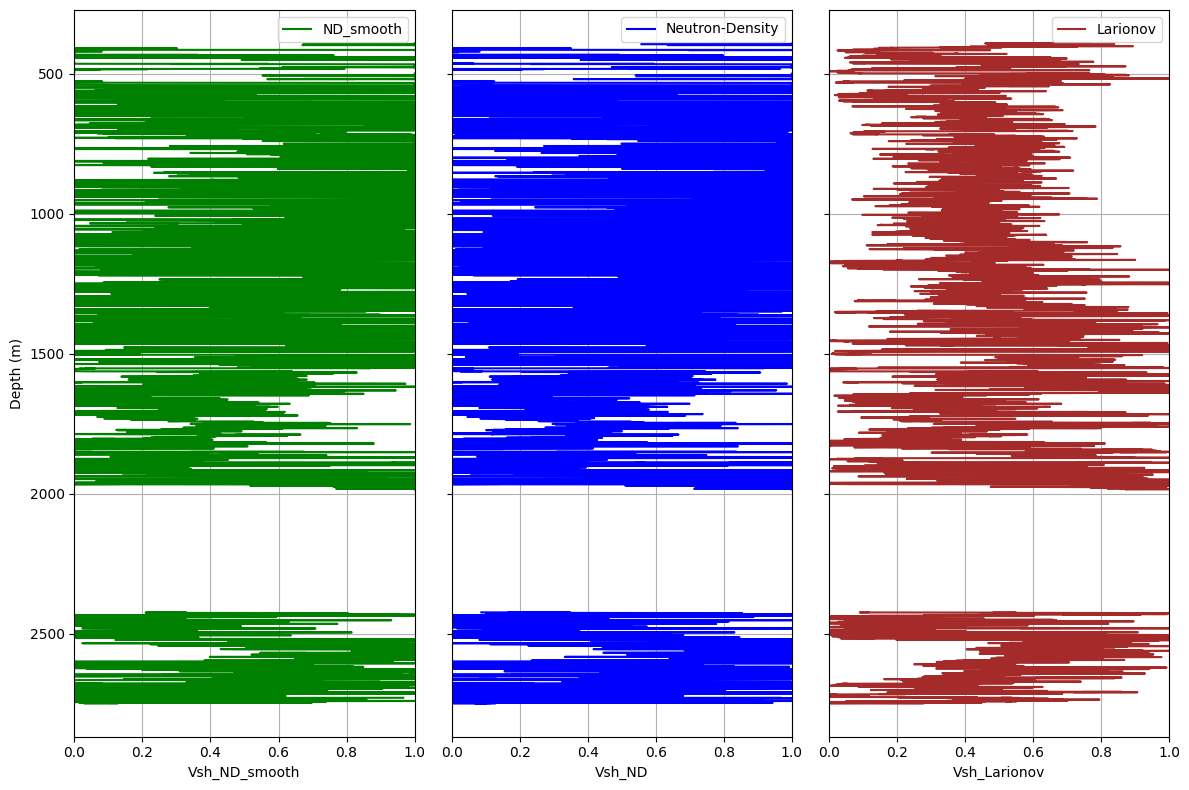

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8), sharey=True)

axes[0].plot(df['Vsh_ND_smooth'], df.index, color='green', label='ND_smooth')
axes[0].invert_yaxis()
axes[0].set_xlabel('Vsh_ND_smooth')
axes[0].set_ylabel('Depth (m)')
axes[0].set_xlim(0, 1)
axes[0].grid()
axes[0].legend()

axes[1].plot(df['Vsh_ND'], df.index, color='blue', label='Neutron-Density')
axes[1].set_xlabel('Vsh_ND')
axes[1].set_xlim(0, 1)
axes[1].grid()
axes[1].legend()

axes[2].plot(df['Vsh_Larionov'], df.index, color='brown', label='Larionov')
axes[2].set_xlabel('Vsh_Larionov')
axes[2].set_xlim(0, 1)
axes[2].grid()
axes[2].legend()

plt.tight_layout()
plt.show()

## Calculando Porosidade Efetiva

**Fórmula**  
$$
\phi_{e} \;=\; \phi_{D} \cdot (1 - V_{sh})
$$

**Parâmetros**  
- **$\phi_{D}$** — porosidade total derivada do perfil de densidade  
- **$V_{sh}$** — volume de argila  
- **$\phi_{e}$** — porosidade efetiva

In [40]:
def phie(phid,Vsh):
    return (phid * (1 - Vsh))

In [41]:
df['PHIE'] = phie(df['PHIT'], df['Vsh_Larionov'])

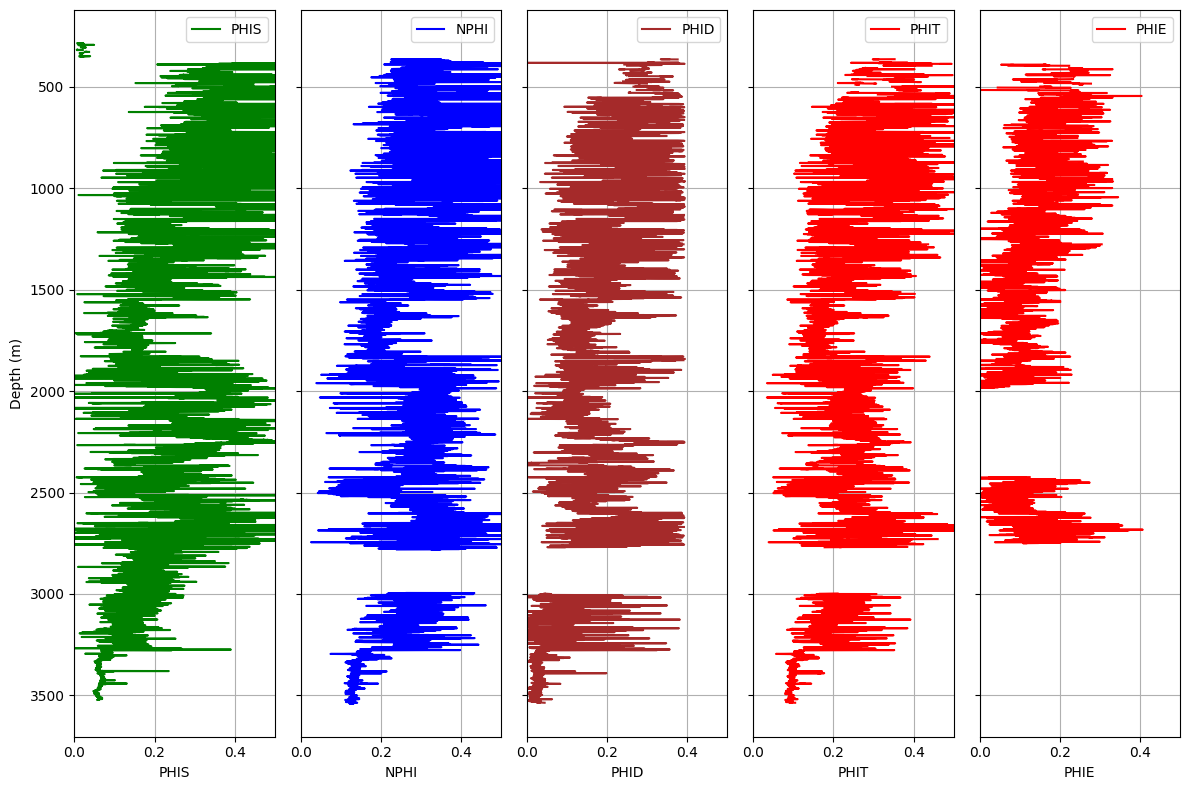

In [52]:
fig, axes = plt.subplots(1, 5, figsize=(12, 8), sharey=True)

axes[0].plot(df['PHIS'], df.index, color='green', label='PHIS')
axes[0].invert_yaxis()
axes[0].set_xlabel('PHIS')
axes[0].set_ylabel('Depth (m)')
axes[0].set_xlim(0, 0.5)
axes[0].grid()
axes[0].legend()

axes[1].plot(df['NPHI'], df.index, color='blue', label='NPHI')
axes[1].set_xlabel('NPHI')
axes[1].set_xlim(0, 0.5)
axes[1].grid()
axes[1].legend()

axes[2].plot(df['PHID'], df.index, color='brown', label='PHID')
axes[2].set_xlabel('PHID')
axes[2].set_xlim(0, 0.5)
axes[2].grid()
axes[2].legend()

axes[3].plot(df['PHIT'], df.index, color='red', label='PHIT')
axes[3].set_xlabel('PHIT')
axes[3].set_xlim(0, 0.5)
axes[3].grid()
axes[3].legend()

axes[4].plot(df['PHIE'], df.index, color='red', label='PHIE')
axes[4].set_xlabel('PHIE')
axes[4].set_xlim(0, 0.5)
axes[4].grid()
axes[4].legend()

plt.tight_layout()
plt.show()

## Calculando Resistividade do Folhelho

In [42]:
rsh = []
for i in df.ZONAS.dropna().unique():
    rsh.append(df[(df.ZONAS==i)&(df.Vsh_Larionov>0.7)].ILD.mean())

## Calculando Resistividade da Água

**Fórmula**  
$$
R_{wa} \;=\; \frac{\phi^{m} \cdot R_{ILD}}{a}
$$

**Parâmetros**  
- **$\phi$** — porosidade (pode ser $\phi_{t}$ ou $\phi_{e}$ dependendo da aplicação)  
- **$R_{ILD}$** — resistividade profunda medida (perfil de indução ou laterolog)  
- **$m$** — expoente da cimentação (padrão 2)  
- **$a$** — fator de tortuosidade (padrão 1)  
- **$R_{wa}$** — resistividade aparente da água de formação  

In [43]:
def rwa_calc(phi,rild,m=2,a=1):
    return ((phi**m)*rild)/a

In [44]:
df['Rwa'] = np.nan
rw = []

for i, j in zip(df.ZONAS.dropna().unique(), rsh):
    mask = df.ZONAS == i

    df.loc[mask, 'Rwa'] = rwa_calc(df.loc[mask, 'PHIT'], df.loc[mask, 'ILD'])

    rw_zone = df.loc[mask, 'Rwa'].quantile(q=0.02)
    rw.append(rw_zone)

In [45]:
print(rw)

[np.float64(0.06266960829939622), np.float64(0.022135779895849132), np.float64(0.05588586481799971)]


## Calculando Saturação

## Calculando Archie

**Fórmula**  
$$
S_{w} \;=\; \left( \frac{a \cdot R_{w}}{\phi^{m} \cdot R_{t}} \right)^{\tfrac{1}{n}}
$$

**Parâmetros**  
- **$\phi$** — porosidade (total ou efetiva, conforme a aplicação)  
- **$R_{t}$** — resistividade verdadeira da formação  
- **$R_{w}$** — resistividade da água de formação  
- **$m$** — expoente da cimentação (padrão 2)  
- **$a$** — fator de tortuosidade (padrão 1)  
- **$n$** — expoente de saturação (padrão 2)  
- **$S_{w}$** — saturação de água da formação  

In [46]:
def sw_archie(phi, rt, rw, m=2, a=1, n=2):
    return ((a * rw) / ((phi ** m) * rt)) ** (1 / n)

In [57]:
df['Sw_Archie'] = np.nan

for i, j in zip(df.ZONAS.dropna().unique(), rw):
    mask = df.ZONAS == i

    df.loc[mask, 'Sw_Archie'] = sw_archie(df.loc[mask, 'PHIT'],
                                          df.loc[mask, 'ILD'],
                                          rw_zone,
                                          m=2, a=1, n=2)

## Calculando Simandoux

**Fórmula**  
$$
S_{w} \;=\; \frac{a \cdot R_{w} \cdot (1 - V_{sh})}{2 \, \phi^{m}}
\left[
\sqrt{\left(\frac{V_{sh}}{R_{sh}}\right)^{2} \;+\; \frac{4 \, \phi^{m}}{a \, R_{w} \, (1 - V_{sh}) \, R_{ILD}}}
\;-\; \frac{V_{sh}}{R_{sh}}
\right]
$$

**Parâmetros**  
- **$V_{sh}$** — volume de argila  
- **$\phi$** — porosidade
- **$R_{ILD}$** — resistividade profunda medida (perfil de indução ou laterolog)  
- **$R_{w}$** — resistividade da água de formação  
- **$R_{sh}$** — resistividade da argila  
- **$m$** — expoente da cimentação (padrão 2)  
- **$a$** — fator de tortuosidade (padrão 1)  
- **$S_{w}$** — saturação de água corrigida para efeito de argila

In [58]:
def sw_simandoux(vsh,phi,rild,rw,rsh,m=2,a=1):
    sw = ((a*rw*(1-vsh))/(2*(phi**m)))*(np.sqrt((vsh/rsh)**2 + ((4*(phi**m))/(a*rw*(1-vsh)*rild)))-(vsh/rsh))
    return sw

In [61]:
df['Sw_Sim'] = np.nan

for i, j, k in zip(df.ZONAS.dropna().unique(), rsh, rw):
    mask = df.ZONAS == i

    df.loc[mask, 'Sw_Sim'] = sw_simandoux(df.loc[mask, 'Vsh_Larionov'],
                                          df.loc[mask, 'PHIE'],
                                          df.loc[mask, 'ILD'],
                                          k, j)

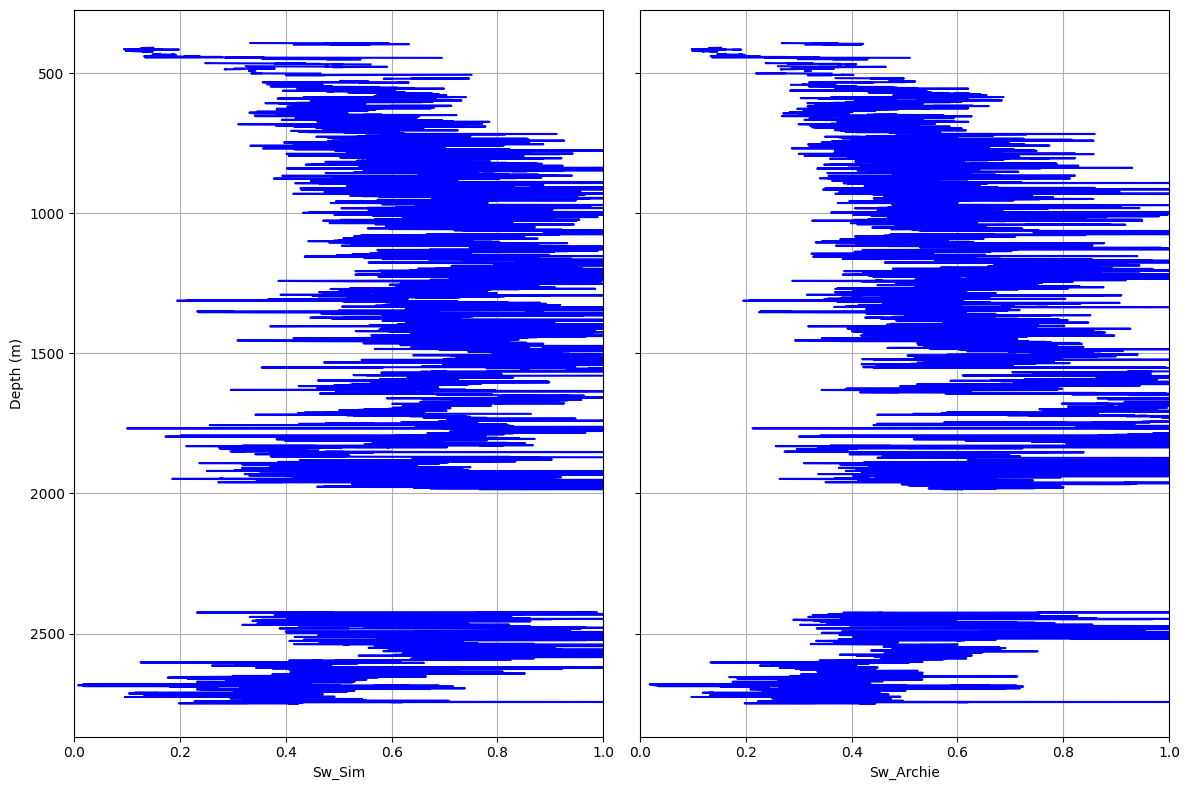

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharey=True)

axes[0].plot(df['Sw_Sim'], df.index, color='blue')
axes[0].invert_yaxis()
axes[0].set_xlabel('Sw_Sim')
axes[0].set_ylabel('Depth (m)')
axes[0].set_xlim(0, 1)
axes[0].grid()

axes[1].plot(df['Sw_Archie'], df.index, color='blue')
axes[1].set_xlabel('Sw_Archie')
axes[1].set_xlim(0, 1)
axes[1].grid()

plt.tight_layout()
plt.show()

## Visualizando resultado

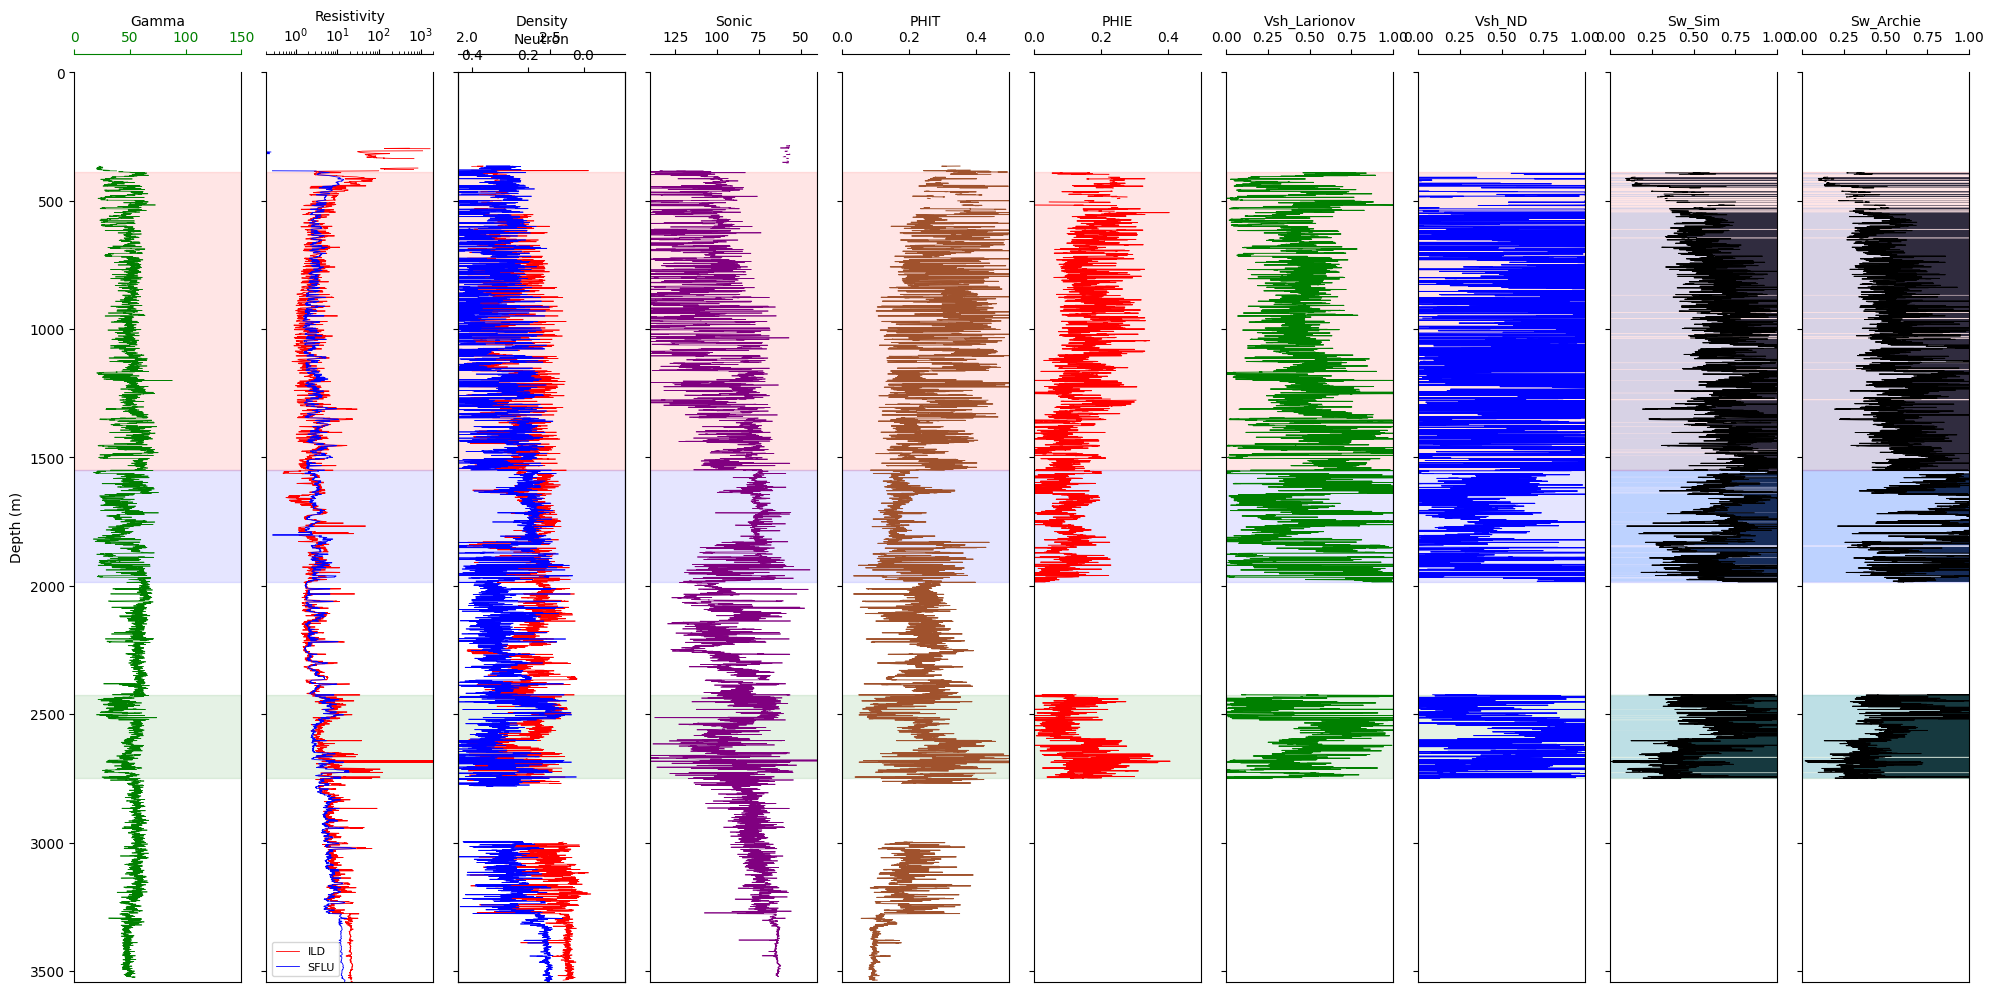

In [107]:
formations = {"A":[390, 1548],
              "B":[1548, 1985],
              "C":[2424, 2750],}


zone_colours = ["red", "blue", "green"]

# --------- Pintura ---------
c_left  = "#cfe8ff"  # azul claro
c_right = "#001a33"  # azul escuro

import matplotlib.pyplot as plt
y = df.index

fig = plt.figure(figsize=(20,10))

ax1   = plt.subplot2grid((1,10), (0,0), colspan=1)           # GR
ax2   = plt.subplot2grid((1,10), (0,1), colspan=1, sharey=ax1)  # RES
ax3   = plt.subplot2grid((1,10), (0,2), colspan=1, sharey=ax1)  # RHOB
ax4   = plt.subplot2grid((1,10), (0,3), colspan=1, sharey=ax1)  # DT
axPHIT= plt.subplot2grid((1,10), (0,4), colspan=1, sharey=ax1)  # PHIT
axPHIE= plt.subplot2grid((1,10), (0,5), colspan=1, sharey=ax1)  # PHIE
axVSHL= plt.subplot2grid((1,10), (0,6), colspan=1, sharey=ax1)  # Vsh_Larionov
axVSHN= plt.subplot2grid((1,10), (0,7), colspan=1, sharey=ax1)  # Vsh_ND
axSWS = plt.subplot2grid((1,10), (0,8), colspan=1, sharey=ax1)  # Sw_Sim
axSWA = plt.subplot2grid((1,10), (0,9), colspan=1, sharey=ax1)  # Sw_Archie

# NPHI como twinx do RHOB
ax5 = ax3.twiny()

# ---------- GR ----------
ax1.plot(df["GR"], y, color="green", linewidth=0.5)
ax1.set_xlabel("Gamma")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")

# ---------- Resistividade ----------
ax2.plot(df["ILD"],  y, color="red",  linewidth=0.6, label="ILD")
ax2.plot(df["SFLU"], y, color="blue", linewidth=0.6, label="SFLU")
ax2.set_xlabel("Resistivity")
ax2.set_xscale("log")
ax2.set_xlim(0.2, 2000)
ax2.legend(loc="lower left", fontsize=8)

# ---------- RHOB ----------
ax3.plot(df["RHOB"], y, color="red", linewidth=0.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)

# ---------- DT ----------
ax4.plot(df["DT"], y, color="purple", linewidth=0.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)

# ---------- NPHI ----------
ax5.plot(df["NPHI"], y, color="blue", linewidth=0.5)
ax5.set_xlabel("Neutron")
ax5.set_xlim(0.45, -0.15)

# ----------  ----------
axPHIT.plot(df["PHIT"], y, color="sienna", linewidth=0.7)
axPHIT.set_xlim(0, 0.5)
axPHIT.set_xlabel("PHIT")

axPHIE.plot(df["PHIE"], y, color="red", linewidth=0.7)
axPHIE.set_xlim(0, 0.5)
axPHIE.set_xlabel("PHIE")

axVSHL.plot(df["Vsh_Larionov"], y, color="green", linewidth=0.7)
axVSHL.set_xlim(0, 1)
axVSHL.set_xlabel("Vsh_Larionov")

axVSHN.plot(df["Vsh_ND"], y, color="blue", linewidth=0.7)
axVSHN.set_xlim(0, 1)
axVSHN.set_xlabel("Vsh_ND")

# ---------- Sw ----------
def shaded_sw(ax, x, y, xmin, xmax, label):
    ax.fill_betweenx(y, xmin, x,  facecolor=c_left,  alpha=0.9, linewidth=0)
    ax.fill_betweenx(y, x,    xmax, facecolor=c_right, alpha=0.9, linewidth=0)
    ax.plot(x, y, color="k", linewidth=0.7)
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(label)

shaded_sw(axSWS, df["Sw_Sim"], y, xmin=0, xmax=1, label="Sw_Sim")
shaded_sw(axSWA, df["Sw_Archie"], y, xmin=0, xmax=1, label="Sw_Archie")

all_axes = [ax1, ax2, ax3, ax4, axPHIT, axPHIE, axVSHL, axVSHN, axSWS, axSWA]

for axi in all_axes:
    axi.xaxis.set_ticks_position("top")
    axi.xaxis.set_label_position("top")
    axi.spines["top"].set_position(("axes", 1.02))
    for depth, colour in zip(formations.values(), zone_colours):
        axi.axhspan(depth[0], depth[1], color=colour, alpha=0.10)

for axi in all_axes[1:]:
    plt.setp(axi.get_yticklabels(), visible=False)

for axi in all_axes:
    axi.set_ylim(y.min(), y.max())
    axi.invert_yaxis()

plt.tight_layout()
fig.subplots_adjust(wspace=0.15)
plt.show()

## EXTRA

## Welly

In [109]:
!pip install welly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.7 MB/s eta 0:00:00


In [110]:
from welly import Well
from welly import Curve

In [113]:
well = Well.from_las("pasta_compartilhada/3-MGP-4-BA.las")

/usr/local/lib/python3.12/dist-packages/welly/curve.py:470: FutureWarning:

Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead



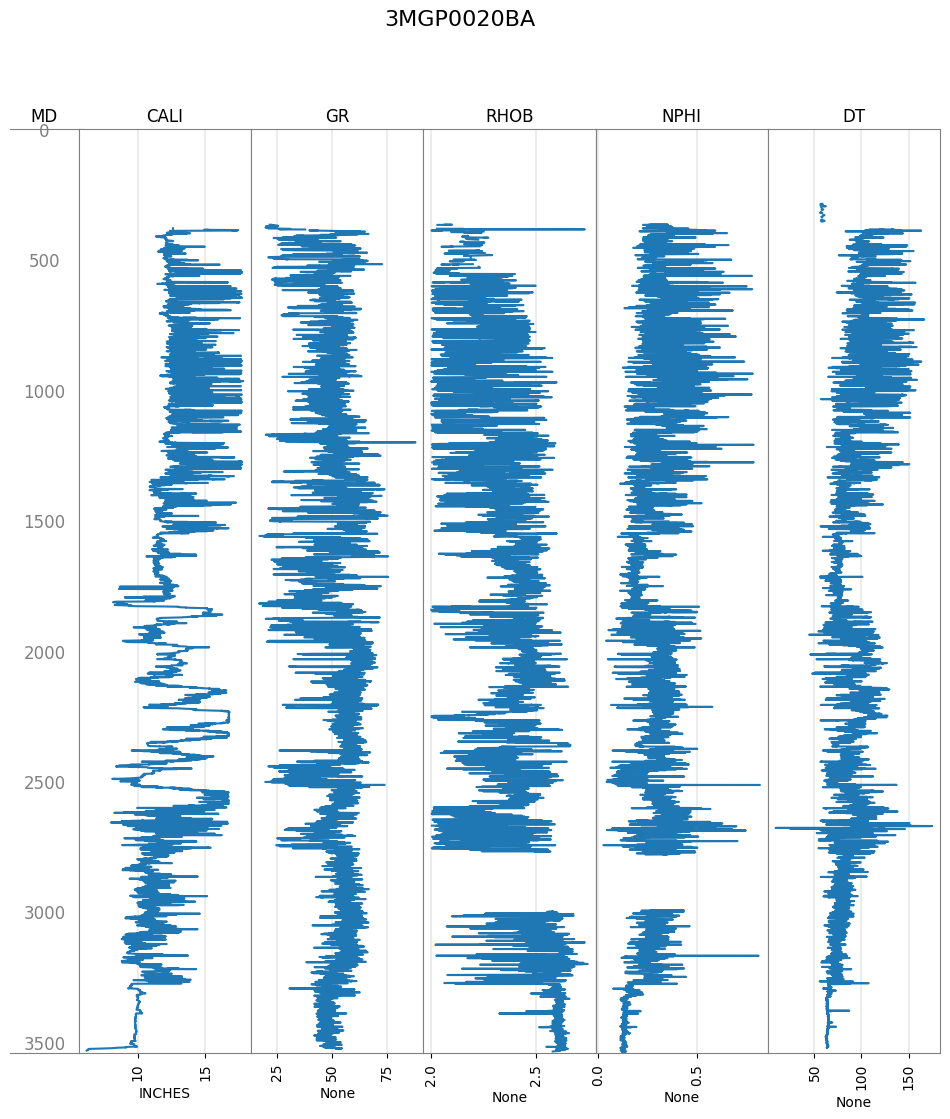

In [114]:
tracks = ['MD', 'CALI', 'GR', 'RHOB', 'NPHI', 'DT']
well.plot(tracks=tracks)

## Petropy

Link: https://toddheitmann.github.io/PetroPy/index.html